In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
access_df = pd.read_csv('./temp data/train.csv')

In [4]:
len(set(access_df.RESOURCE))
len(access_df)

32769

In [4]:
access_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32769 entries, 0 to 32768
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ACTION            32769 non-null  int64
 1   RESOURCE          32769 non-null  int64
 2   MGR_ID            32769 non-null  int64
 3   ROLE_ROLLUP_1     32769 non-null  int64
 4   ROLE_ROLLUP_2     32769 non-null  int64
 5   ROLE_DEPTNAME     32769 non-null  int64
 6   ROLE_TITLE        32769 non-null  int64
 7   ROLE_FAMILY_DESC  32769 non-null  int64
 8   ROLE_FAMILY       32769 non-null  int64
 9   ROLE_CODE         32769 non-null  int64
dtypes: int64(10)
memory usage: 2.5 MB


In [ ]:
# no missing data 
# no categorical data. But feels as though a lot of these things (all) of these things are categories. 

# I wonder if it would be a worthwhile experiment to treat as numeric then treat as cat.I guess further down we see that each column has too many unique values to treat them as cat. 

In [5]:
access_df.sample(3)

ACTION  RESOURCE  MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  ROLE_DEPTNAME  \
11718       1     34346   33266         117961         118300         124725   
17755       1     26985  132529         117902         117903         132530   
18523       1     79623  311198          91261         118026         122392   

       ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  ROLE_CODE  
11718      118784            118785       290919     118786  
17755      118321            117906       290919     118322  
18523      118274            173805       292795     118276

In [8]:
access_df.ACTION.value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

In [ ]:
# so class imbalance 

In [10]:
access_df.apply(np.unique).apply(len)

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

array([[<AxesSubplot:title={'center':'ACTION'}>,
        <AxesSubplot:title={'center':'RESOURCE'}>,
        <AxesSubplot:title={'center':'MGR_ID'}>],
       [<AxesSubplot:title={'center':'ROLE_ROLLUP_1'}>,
        <AxesSubplot:title={'center':'ROLE_ROLLUP_2'}>,
        <AxesSubplot:title={'center':'ROLE_DEPTNAME'}>],
       [<AxesSubplot:title={'center':'ROLE_TITLE'}>,
        <AxesSubplot:title={'center':'ROLE_FAMILY_DESC'}>,
        <AxesSubplot:title={'center':'ROLE_FAMILY'}>],
       [<AxesSubplot:title={'center':'ROLE_CODE'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

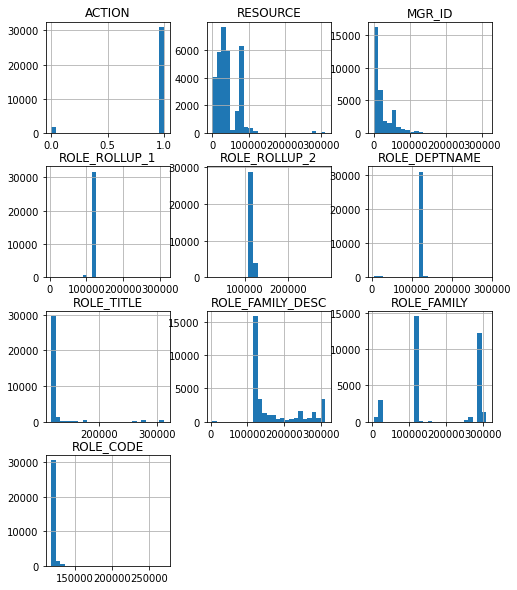

In [11]:
access_df.hist(figsize=(8,10),bins=25)

In [12]:
access_df = access_df.drop(['RESOURCE'],axis=1)

In [13]:
base_dir = 'D:\\Projects\\FailSafe_500'
import os 
os.chdir(base_dir)
from Utils import heatmap as hmp
os.chdir('.\\11. AmazonAccess')

['ACTION', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']


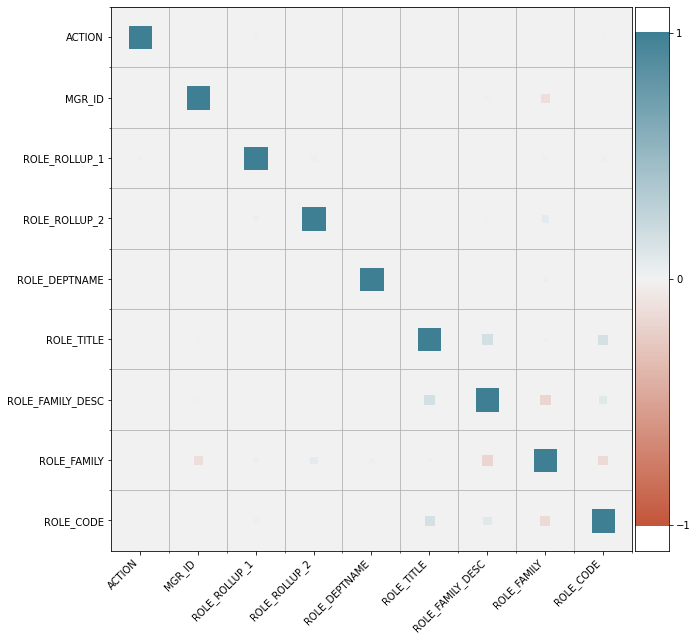

In [14]:
%matplotlib inline

corr = access_df.corr()
plt.figure(figsize=(10, 10))
hmp.corrplot(corr)

Decision Tree for Visualization

In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from Utils.Metrics import classification as classification_metrics

In [19]:
results_df = pd.DataFrame()

In [18]:
# split data

X_train, X_test, y_train, y_test = train_test_split(access_df.drop('ACTION',axis=1), access_df.ACTION, test_size=0.2)

# encode y
le = LabelEncoder()
le.fit(pd.concat([y_train, y_test],axis=0))  
y_train = le.transform(y_train) 
y_test = le.transform(y_test)

# not going to scale features 

In [21]:
dt_clf = DecisionTreeClassifier() 
dt_clf.fit(X_train,y_train)
y_pred = dt_clf.predict(X_test)
y_true = le.inverse_transform(y_test)
results_row = classification_metrics.calc_results_row(y_pred, y_true, 'Decision Tree (default param)')
results_df = results_df.append(results_row, ignore_index=True)
results_df 

model        f1  accuracy  precision    recall
0  Decision Tree (default param)  0.731453  0.941257   0.718438  0.746539

In [26]:
dt_clf.get_depth()

27

In [28]:
# pruning for simple tree

path = dt_clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1] 
alpha_vals=[]
for ccp_alpha in ccp_alphas:
    dt_clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    scores = cross_val_score(dt_clf, X_train, y_train, cv = 5) #probably for neatness should just train cv object and extract best param
    alpha_vals.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results_df = pd.DataFrame(alpha_vals, columns = ['alpha','mean_accuracy','std'])


C:\Users\nikig\anaconda3\envs\AutoML\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nikig\anaconda3\envs\AutoML\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nikig\anaconda3\envs\AutoML\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\nikig\anaconda3\envs\AutoML\lib\site-packages\sklearn\tree\_classes.py", line 157, in fit
    raise ValueError("ccp_alpha must be greater than or eq

In [34]:
alpha_results_df.sort_values('mean_accuracy', ascending=False).head(1).alpha

746    0.000107
Name: alpha, dtype: float64

In [36]:
alpha_best = 0.000107
dt_pruned_clf = DecisionTreeClassifier(ccp_alpha=alpha_best)
dt_pruned_clf.fit(X_train, y_train)

y_pred = dt_pruned_clf.predict(X_test)
y_true = y_test
results_row = classification_metrics.calc_results_row(y_pred, y_true, 'Decision Tree (best alpha)')
results_df = results_df.append(results_row, ignore_index=True)
results_df

model        f1  accuracy  precision    recall
0  Decision Tree (default param)  0.731453  0.941257   0.718438  0.746539
1     Decision Tree (best alpha)  0.665965  0.949191   0.764700  0.624971

In [41]:
dt_pruned_clf.get_depth()

16

In [42]:
from dtreeviz.trees import dtreeviz 

viz = dtreeviz(dt_pruned_clf, X_train, y_train,
                target_name="ACTION",
                feature_names=access_df.drop(['ACTION'],axis=1).columns,
                class_names=list(le.classes_))

viz

C:\Users\nikig\anaconda3\envs\AutoML\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
